In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.io import fits
from matplotlib_venn import venn3, venn3_circles

In [2]:
# Reading in Machine Learning and Spectroscopy Data
spec = pd.read_csv('/home/shawn/Downloads/final_sample.csv')
spec_in_gama = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/spec_in_gama.csv')
spec_with_mass = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/spec_with_mass.csv')

mac = pd.read_csv('/home/shawn/Downloads/linkstable_trimmed.csv')
mac_in_gama = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/mac_in_gama.csv')
mac_in_gama_withgamaid = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/mac_in_gama_withgamaid.csv')
mac_with_mass = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/mac_with_mass.csv')

zoo_in_gama = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/zoo_in_gama.csv')
zoo_in_gama_found_lens = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/zoo_in_gama_found_lens.csv')
zoo_20 = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/zoo_20.csv')
zoo_with_mass = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/zoo_with_mass.csv')
zoo_lens_with_mass = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/zoo_lens_with_mass.csv')
zoo_lens20_with_mass = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/zoo_lens20_with_mass.csv')

mac_and_spec_matches = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/mac_and_spec_matches.csv')
mac_and_zoo_matches = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/mac_and_zoo_matches.csv')
spec_and_zoo_matches = pd.read_csv('/home/shawn/Documents/Lens_Project_Files/spec_and_zoo_matches.csv')

In [3]:
# Spec shows 85 objects in G09, G12, and G15
spec_in_gama

,Unnamed: 0,Unnamed: 0.1,RA,DEC,z1,z2,spec_type,GAMA_ID
0,0,0,138.28150,-0.66673,0.163,0.321,PG+ELG,198082
1,1,1,129.69546,-0.38179,0.418,0.738,PG+ELG,202448
2,2,2,136.63883,-0.35203,0.282,0.449,PG+ELG,204140
3,3,3,132.36771,0.16360,0.128,0.603,PG+ELG,209222
4,4,4,132.61013,0.11972,0.313,0.608,PG+ELG,209295
5,5,5,134.02979,0.15244,0.167,0.158,PG+ELG,209584
6,6,6,140.14187,0.97341,0.586,0.336,PG+ELG,279956
7,7,7,135.32929,1.22984,0.487,0.247,PG+ELG,301818
8,8,8,138.94058,1.33144,0.593,0.404,PG+ELG,302719
9,9,9,130.73717,1.55957,0.416,0.350,PG+ELG,323200


In [29]:
# Spec with mass for those objects which were measured (still no count)
spec_with_mass

,Unnamed: 0,Unnamed: 0.1,RA,DEC,z1,z2,spec_type,GAMA_ID,STELLAR_MASS,Z
0,0,0,138.28150,-0.66673,0.163,0.321,PG+ELG,198082,3.025000e+10,0.1632
1,1,1,129.69546,-0.38179,0.418,0.738,PG+ELG,202448,NaN,NaN
2,2,2,136.63883,-0.35203,0.282,0.449,PG+ELG,204140,8.578000e+10,0.2818
3,3,3,132.36771,0.16360,0.128,0.603,PG+ELG,209222,1.425000e+10,0.1277
4,4,4,132.61013,0.11972,0.313,0.608,PG+ELG,209295,8.456000e+10,0.3126
5,5,5,134.02979,0.15244,0.167,0.158,PG+ELG,209584,NaN,NaN
6,6,6,140.14187,0.97341,0.586,0.336,PG+ELG,279956,NaN,NaN
7,7,7,135.32929,1.22984,0.487,0.247,PG+ELG,301818,1.215000e+11,0.4862
8,8,8,138.94058,1.33144,0.593,0.404,PG+ELG,302719,1.474000e+11,0.5933
9,9,9,130.73717,1.55957,0.416,0.350,PG+ELG,323200,1.216000e+11,0.4158


In [24]:
# Mac shows 421 objects in G09, G12, and G15
mac_in_gama

,Unnamed: 0,ID,score,P1,P3,RA,DEC,DISC
0,0,2251.0,64.0,0.887,0.901,131.33397,-0.91563,0.0
1,1,2660.0,30.0,0.990,0.989,132.98734,1.50468,0.0
2,2,2967.0,30.0,1.000,1.000,130.54643,1.64325,0.0
3,3,2669.0,28.0,NaN,0.858,140.35284,-0.97414,0.0
4,4,1933.0,26.0,NaN,0.883,135.88864,-0.97487,0.0
5,5,1906.0,26.0,0.929,NaN,129.23265,-1.57512,0.0
6,6,2007.0,24.0,0.936,NaN,137.85838,-0.75280,0.0
7,7,2756.0,22.0,NaN,0.924,134.57492,-1.55142,0.0
8,8,2366.0,22.0,0.837,NaN,140.47475,-0.10551,0.0
9,9,1704.0,20.0,0.985,NaN,138.66089,-1.11639,0.0


In [6]:
# Mac with GAMA ID added
mac_in_gama_withgamaid

,Unnamed: 0,GAMA_ID,ID,RA,DEC,SCORE
0,0,3899011.0,2251.0,131.33397,-0.91563,64.0
1,1,376338.0,2660.0,132.98734,1.50468,30.0
2,2,323152.0,2967.0,130.54643,1.64325,30.0
3,3,663364.0,2669.0,140.35284,-0.97414,28.0
4,4,3629152.0,1933.0,135.88864,-0.97487,26.0
5,5,3575500.0,1906.0,129.23265,-1.57512,26.0
6,6,197972.0,2007.0,137.85838,-0.75280,24.0
7,7,3883690.0,2756.0,134.57492,-1.55142,22.0
8,8,NaN,NaN,NaN,NaN,NaN
9,9,3911769.0,1704.0,138.66089,-1.11639,20.0


In [7]:
# Mac with mass for thoseobjects which were measured (still no count)
mac_with_mass

,Unnamed: 0,Unnamed: 0.1,GAMA_ID,ID,RA,DEC,SCORE,STELLAR_MASS,Z
0,0,0,3899011.0,2251.0,131.33397,-0.91563,64.0,3.294000e+11,0.4027
1,1,1,376338.0,2660.0,132.98734,1.50468,30.0,3.034000e+11,0.3272
2,2,2,323152.0,2967.0,130.54643,1.64325,30.0,8.277000e+11,0.7216
3,3,3,663364.0,2669.0,140.35284,-0.97414,28.0,2.688000e+11,0.3221
4,4,4,3629152.0,1933.0,135.88864,-0.97487,26.0,2.129000e+11,0.4059
5,5,5,3575500.0,1906.0,129.23265,-1.57512,26.0,3.209000e+11,0.3652
6,6,6,197972.0,2007.0,137.85838,-0.75280,24.0,3.551000e+11,0.3373
7,7,7,3883690.0,2756.0,134.57492,-1.55142,22.0,1.362000e+11,0.2481
8,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9,3911769.0,1704.0,138.66089,-1.11639,20.0,1.740000e+11,0.2794


In [8]:
# 38769 total objects from Galaxy Zoo.
zoo_in_gama

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE
0,0,491457,211.73487,-1.59471,0.000000
1,1,460298,211.51452,-1.65754,0.000000
2,2,460345,211.78462,-1.71899,0.000000
3,3,484623,211.63878,-1.93563,0.000000
4,4,484637,211.79006,-1.89456,0.169778
5,5,491454,211.71473,-1.54075,0.000000
6,6,491414,211.50587,-1.53749,0.000000
7,7,484621,211.63321,-1.96885,0.061127
8,8,463119,211.54913,-1.22789,0.000000
9,9,463148,211.68703,-1.33978,0.143398


In [9]:
# Zoo identified 12933 lenses with score above 0.
zoo_in_gama_found_lens

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE
0,0,484637,211.79006,-1.89456,0.169778
1,1,484621,211.63321,-1.96885,0.061127
2,2,463148,211.68703,-1.33978,0.143398
3,3,543438,211.53734,-1.03689,0.213034
4,4,463145,211.63664,-1.23923,0.000755
5,5,460374,212.03548,-1.70230,0.024226
6,6,484655,211.88866,-1.97102,0.003699
7,7,460379,211.94664,-1.71637,0.110855
8,8,463176,211.81052,-1.19533,0.045798
9,9,463197,212.00002,-1.29196,0.093139


In [32]:
# Zoo identified 462 lenses with score above 20.
zoo_20

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE
0,0,543438,211.53734,-1.03689,0.213034
1,1,491933,213.94101,-1.42622,0.236187
2,2,463601,213.79297,-1.24519,0.221626
3,3,492121,214.80569,-1.40320,0.237688
4,4,511867,216.38846,-1.11396,0.352229
5,5,511865,216.31907,-1.13127,0.315974
6,6,485529,216.24766,-1.86855,0.246178
7,7,485866,217.55467,-1.72059,0.202707
8,8,485873,217.75015,-1.80042,0.349456
9,9,508674,217.85610,-1.47254,0.214371


In [11]:
# All Zoo objects with masses
zoo_with_mass

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE,STELLAR_MASS,Z
0,0,491457,211.73487,-1.59471,0.000000,3.614000e+10,0.0292
1,1,460298,211.51452,-1.65754,0.000000,2.086000e+09,0.0542
2,2,460345,211.78462,-1.71899,0.000000,7.277000e+10,0.1134
3,3,484623,211.63878,-1.93563,0.000000,4.556000e+10,0.1023
4,4,484637,211.79006,-1.89456,0.169778,3.489000e+10,0.1029
5,5,491454,211.71473,-1.54075,0.000000,8.118000e+10,0.0295
6,6,491414,211.50587,-1.53749,0.000000,1.819000e+10,0.0702
7,7,484621,211.63321,-1.96885,0.061127,2.298000e+10,0.0351
8,8,463119,211.54913,-1.22789,0.000000,1.140000e+10,0.0533
9,9,463148,211.68703,-1.33978,0.143398,9.270000e+09,0.0535


In [12]:
# Zoo objects with score > 0 with masses
zoo_lens_with_mass

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE,STELLAR_MASS,Z
0,0,484637,211.79006,-1.89456,0.169778,3.489000e+10,0.1029
1,1,484621,211.63321,-1.96885,0.061127,2.298000e+10,0.0351
2,2,463148,211.68703,-1.33978,0.143398,9.270000e+09,0.0535
3,3,543438,211.53734,-1.03689,0.213034,8.980000e+09,0.0701
4,4,463145,211.63664,-1.23923,0.000755,5.946000e+09,0.1378
5,5,460374,212.03548,-1.70230,0.024226,4.848000e+10,0.0250
6,6,484655,211.88866,-1.97102,0.003699,1.321000e+10,0.0564
7,7,460379,211.94664,-1.71637,0.110855,1.077000e+11,0.1136
8,8,463176,211.81052,-1.19533,0.045798,5.776000e+09,0.0545
9,9,463197,212.00002,-1.29196,0.093139,1.316000e+11,0.1164


In [35]:
# Zoo objects with score > 20 with masses
zoo_lens20_with_mass

,Unnamed: 0,GAMA_ID,RA,DEC,LENS_SCORE,STELLAR_MASS,Z
0,0,543438,211.53734,-1.03689,0.213034,8.980000e+09,0.0701
1,1,491933,213.94101,-1.42622,0.236187,3.441000e+10,0.1080
2,2,463601,213.79297,-1.24519,0.221626,8.025000e+10,0.1481
3,3,492121,214.80569,-1.40320,0.237688,2.811000e+10,0.1022
4,4,511867,216.38846,-1.11396,0.352229,5.459000e+10,0.0550
5,5,511865,216.31907,-1.13127,0.315974,2.066000e+10,0.0845
6,6,485529,216.24766,-1.86855,0.246178,8.986000e+08,0.0302
7,7,485866,217.55467,-1.72059,0.202707,4.080000e+09,0.0548
8,8,485873,217.75015,-1.80042,0.349456,4.908000e+10,0.0539
9,9,508674,217.85610,-1.47254,0.214371,2.560000e+10,0.0915


/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([439., 473., 469., 472., 497., 495., 496., 425., 409., 360., 309.,
        279., 297., 237., 190., 235., 154., 142., 159., 145., 101.,  93.,
         91.,  85.,  93.,  45.,  61.,  57.,  42.,  41.,  56.,  69.,  34.,
         31.,  27.,  21.,  20.,  18.,  25.,  16.,  21.,  30.,  18.,  11.,
         14.,   8.,   5.,  10.,   7.,   7.,   7.,   5.,   5.,   3.,   5.,
          5.,   7.,   3.,   5.,  10.,   3.,   1.,   2.,   2.,   4.,   1.,
          3.,   1.,   0.,   2.,   2.,   2.,   0.,   1.,   1.,   1.,   1.,
          3.,   2.,   2.,   0.,   0.,   0.,   0.,   1.,   2.,   1.,   1.,
          0.,   0.,   1.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

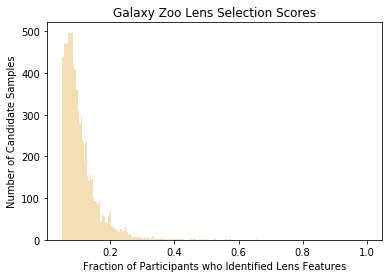

In [14]:
# Histogram of Lens Scores
plt.xlabel("Fraction of Participants who Identified Lens Features")
plt.ylabel("Number of Candidate Samples")
plt.title("Galaxy Zoo Lens Selection Scores")
plt.hist(zoo_in_gama_found_lens.LENS_SCORE,range=[0.05,1],bins=200,color='wheat')

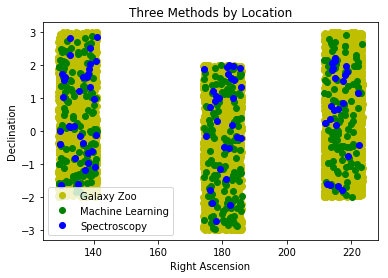

In [15]:
# Plot of three methods by location in three fields. Zoo data 
# is given for all objects that received score > 0
plt.plot(zoo_in_gama_found_lens.RA,zoo_in_gama_found_lens.DEC,'yo',label='Galaxy Zoo')
plt.plot(mac_in_gama.RA,mac_in_gama.DEC,'go',label='Machine Learning')
plt.plot(spec_in_gama.RA,spec_in_gama.DEC,'bo',label='Spectroscopy')

plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("Three Methods by Location")
plt.legend(loc='best')

plt.show()

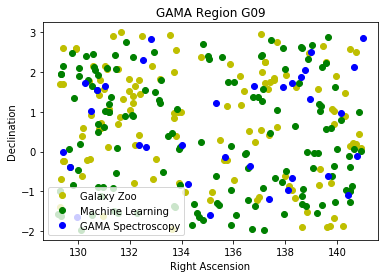

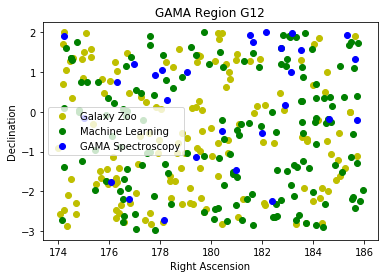

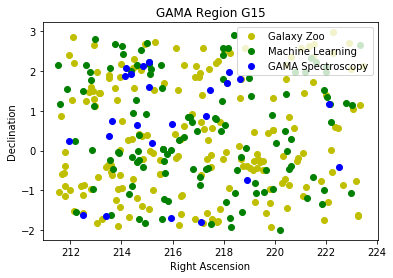

In [16]:
# Identifying the lenses found in GAMA Regions G09, G12, and G15 from

spec_in_G09 = spec[(spec.ra >= 129.0) & (spec.ra <= 141.0) & (spec.dec >= -2) & (spec.dec <= 3)]
spec_in_G12 = spec[(spec.ra >= 174.0) & (spec.ra <= 186.0) & (spec.dec >= -3) & (spec.dec <= 2)]                   
spec_in_G15 = spec[(spec.ra >= 211.5) & (spec.ra <= 223.5) & (spec.dec >= -2) & (spec.dec <= 3)]

mac_in_G09 = mac[(mac.RA >= 129.0) & (mac.RA <= 141.0) & (mac.DEC >= -2) & (mac.DEC <= 3)]
mac_in_G12 = mac[(mac.RA >= 174.0) & (mac.RA <= 186.0) & (mac.DEC >= -3) & (mac.DEC <= 2)]
mac_in_G15 = mac[(mac.RA >= 211.5) & (mac.RA <= 223.5) & (mac.DEC >= -2) & (mac.DEC <= 3)]

zoo_20_in_G09 = zoo_20[(zoo_20.RA >= 129.0) & (zoo_20.RA <= 141.0) & (zoo_20.DEC >= -2) & (zoo_20.DEC <= 3)]
zoo_20_in_G12 = zoo_20[(zoo_20.RA >= 174.0) & (zoo_20.RA <= 186.0) & (zoo_20.DEC >= -3) & (zoo_20.DEC <= 2)]
zoo_20_in_G15 = zoo_20[(zoo_20.RA >= 211.5) & (zoo_20.RA <= 223.5) & (zoo_20.DEC >= -2) & (zoo_20.DEC <= 3)]


# Plots of individual GAMA regions G09, G12, and G15 to show the distribution.
# Plot of G09.
plt.plot(zoo_20_in_G09.RA,zoo_20_in_G09.DEC,'yo',label='Galaxy Zoo')
plt.plot(mac_in_G09.RA,mac_in_G09.DEC,'go',label='Machine Learning')
plt.plot(spec_in_G09.ra,spec_in_G09.dec,'bo',label='GAMA Spectroscopy')

plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("GAMA Region G09")
plt.legend(loc='best')

plt.show()

# Plot of G12.
plt.plot(zoo_20_in_G12.RA,zoo_20_in_G12.DEC,'yo',label='Galaxy Zoo')
plt.plot(mac_in_G12.RA,mac_in_G12.DEC,'go',label='Machine Learning')
plt.plot(spec_in_G12.ra,spec_in_G12.dec,'bo',label='GAMA Spectroscopy')

plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("GAMA Region G12")
plt.legend(loc='best')

plt.show()

# Plot of G15.
plt.plot(zoo_20_in_G15.RA,zoo_20_in_G15.DEC,'yo',label='Galaxy Zoo')
plt.plot(mac_in_G15.RA,mac_in_G15.DEC,'go',label='Machine Learning')
plt.plot(spec_in_G15.ra,spec_in_G15.dec,'bo',label='GAMA Spectroscopy')

plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("GAMA Region G15")
plt.legend(loc='best')

plt.show()

In [40]:
# Found 4 matches between Mac and Spec
mac_and_spec_matches

,Unnamed: 0,GAMA_ID,ID,RA,DEC,MAC_SCORE
0,78,202448,1129.0,129.69546,-0.38179,4.0
1,79,323200,3430.0,130.73717,1.55957,4.0
2,278,220682,1618.0,182.74350,1.59787,4.0
3,368,342308,501.0,215.06900,2.22422,4.0


In [18]:
# Found 11 matches between Mac and Zoo (1 duplicate)
mac_and_zoo_matches

,Unnamed: 0,GAMA_ID,ID,RA,DEC,MAC_SCORE,ZOO_SCORE
0,124,517068,3063.0,130.59385,2.46237,4.0,0.137209
1,151,165409,3098.0,181.19655,-2.72003,38.0,0.059543
2,158,124486,2553.0,179.72998,-2.51919,28.0,0.426190
3,166,165871,2803.0,183.70237,-2.78805,18.0,0.282701
4,168,164145,2805.0,176.55308,-2.77562,16.0,0.092265
5,170,271500,2496.0,174.51145,1.34984,16.0,0.139357
6,293,271500,375.0,174.51145,1.34984,4.0,0.139357
7,300,136604,1642.0,175.87349,-1.74167,58.0,0.316451
8,389,618600,613.0,216.26346,0.26191,4.0,0.011410
9,393,106569,1524.0,216.66542,0.84988,4.0,0.178933


In [19]:
# Found 1 match between Spec and Zoo
spec_and_zoo_matches

,Unnamed: 0,GAMA_ID,RA,DEC,ZOO_SCORE
0,79,460463,212.48058,-1.61746,0.139206


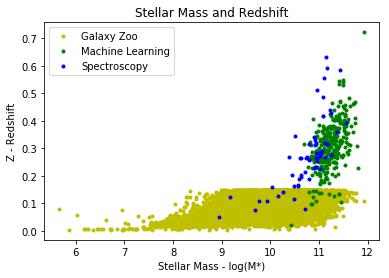

In [20]:
# Plot of Z to Stellar Mass using Zoo with Lens Score > 0.
plt.plot(np.log10(zoo_lens_with_mass.STELLAR_MASS), zoo_lens_with_mass.Z,'y.',label='Galaxy Zoo')
plt.plot(np.log10(mac_with_mass.STELLAR_MASS), mac_with_mass.Z, 'g.',label='Machine Learning')
plt.plot(np.log10(spec_with_mass.STELLAR_MASS), spec_with_mass.Z, 'b.',label='Spectroscopy')

plt.xlabel("Stellar Mass - log(M*)")
plt.ylabel("Z - Redshift")
plt.title("Stellar Mass and Redshift")
plt.legend(loc='best')

plt.show()

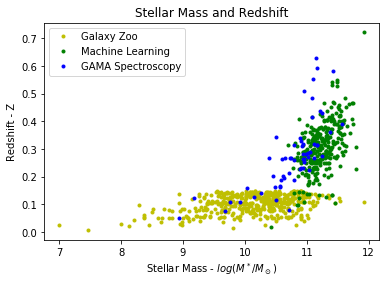

In [21]:
# Same plot as above, using Zoo with Lens Score above 20%
plt.plot(np.log10(zoo_lens20_with_mass.STELLAR_MASS), zoo_lens20_with_mass.Z, 'y.',label='Galaxy Zoo')
plt.plot(np.log10(mac_with_mass.STELLAR_MASS), mac_with_mass.Z, 'g.',label='Machine Learning')
plt.plot(np.log10(spec_with_mass.STELLAR_MASS), spec_with_mass.Z, 'b.',label='GAMA Spectroscopy')

plt.xlabel(r"Stellar Mass - $log(M^*/M_\odot)$")
plt.ylabel("Redshift - Z")
plt.title("Stellar Mass and Redshift")
plt.legend(loc='best')

plt.show()

In [ ]:
### 6/8 Next thing I need to do is get the masses on the matched dataframes.